In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import re

In [3]:
dataset_1 = pd.read_csv('./dataset/HzAGN_Groups_0_3_noMcut_InfallTime_matched.csv')

In [4]:
dataset_2 = pd.read_csv('./dataset/HzAGN_Groups_0_3_noMcut_InfallTime_matched_1.csv')

In [5]:
dataset_1.head()

,idgroup_1,relax,ID_1,id[1],Ra[2],Dec[3],z[4],zphot[5],zphotup[6],zphotdown[7],...,Rvir_deg,vsig,Rmax_deg,sigma_vz,sigma_vy,sigma_vx,rank_gg,offset,GroupID,GroupSize
0,3077,1,22,3553,-0.15976,-0.46951,0.99832,0.0,0.0,0.0,...,0.00785,254.1469,0.01259,198.174662,184.2864,135.84045,0,0.348211,1,9
1,3077,1,23,3554,-0.15756,-0.46617,0.99835,0.0,0.0,0.0,...,0.00785,284.0533,0.01259,198.174662,184.2864,135.84045,0,0.262511,1,9
2,3077,1,24,3560,-0.16319,-0.47106,0.99822,0.0,0.0,0.0,...,0.00785,208.1544,0.01259,198.174662,184.2864,135.84045,0,0.827232,1,9
3,3077,1,25,3561,-0.16792,-0.46637,0.99826,0.0,0.0,0.0,...,0.00785,265.0288,0.01259,198.174662,184.2864,135.84045,0,1.366920,1,9
4,3077,1,26,3793,-0.16778,-0.46684,0.99814,0.0,0.0,0.0,...,0.00785,222.6391,0.01259,198.174662,184.2864,135.84045,0,1.340197,1,9


In [6]:
dataset_2.head()

,idgroup_1,relax3d,ID_1,id[1],Ra[2],Dec[3],z[4],zphot[5],zphotup[6],zphotdown[7],...,Rvir_deg,vsig,Rmax_deg,sigma_vz,sigma_vy,sigma_vx,rank_gg,offset,GroupID,GroupSize
0,3077,1,22,3553,-0.15976,-0.46951,0.99832,0.0,0.0,0.0,...,0.00785,254.1469,0.01259,198.174662,184.2864,135.84045,0,0.348211,1.0,9.0
1,3077,1,23,3554,-0.15756,-0.46617,0.99835,0.0,0.0,0.0,...,0.00785,284.0533,0.01259,198.174662,184.2864,135.84045,0,0.262511,1.0,9.0
2,3077,1,24,3560,-0.16319,-0.47106,0.99822,0.0,0.0,0.0,...,0.00785,208.1544,0.01259,198.174662,184.2864,135.84045,0,0.827232,1.0,9.0
3,3077,1,25,3561,-0.16792,-0.46637,0.99826,0.0,0.0,0.0,...,0.00785,265.0288,0.01259,198.174662,184.2864,135.84045,0,1.366920,1.0,9.0
4,3077,1,26,3793,-0.16778,-0.46684,0.99814,0.0,0.0,0.0,...,0.00785,222.6391,0.01259,198.174662,184.2864,135.84045,0,1.340197,1.0,9.0


In [7]:
dataset_1.tail()

,idgroup_1,relax,ID_1,id[1],Ra[2],Dec[3],z[4],zphot[5],zphotup[6],zphotdown[7],...,Rvir_deg,vsig,Rmax_deg,sigma_vz,sigma_vy,sigma_vx,rank_gg,offset,GroupID,GroupSize
45203,2285551,0,45857,2171798,-0.49292,-0.42343,2.00457,0.0,0.0,0.0,...,0.00527,372.1910,0.00981,127.498099,191.825297,225.736693,0,0.317573,2604,12
45204,2285551,0,45858,2171799,-0.49142,-0.42515,2.00458,0.0,0.0,0.0,...,0.00527,237.7404,0.00981,127.498099,191.825297,225.736693,0,0.115515,2604,12
45205,2285551,0,45859,2171800,-0.49119,-0.42541,2.00461,0.0,0.0,0.0,...,0.00527,176.4346,0.00981,127.498099,191.825297,225.736693,0,0.181381,2604,12
45206,2285551,0,45854,2171343,-0.49285,-0.42169,2.00457,0.0,0.0,0.0,...,0.00527,206.9181,0.00981,127.498099,191.825297,225.736693,1,0.603060,2604,12
45207,2285551,0,45856,2171376,-0.49183,-0.42467,2.00461,0.0,0.0,0.0,...,0.00527,241.9885,0.00981,127.498099,191.825297,225.736693,31,0.005689,2604,12


In [8]:
dataset_2.tail()

,idgroup_1,relax3d,ID_1,id[1],Ra[2],Dec[3],z[4],zphot[5],zphotup[6],zphotdown[7],...,Rvir_deg,vsig,Rmax_deg,sigma_vz,sigma_vy,sigma_vx,rank_gg,offset,GroupID,GroupSize
45226,2287758,0,45905,2173811,0.30914,-0.20999,2.00060,0.0,0.0,0.0,...,0.00002,163.85010,0.0153,244.698215,333.033146,290.51848,0,136.668733,2604.0,21.0
45227,2287758,0,45906,2174269,0.31159,-0.20664,2.00094,0.0,0.0,0.0,...,0.00002,130.87050,0.0153,244.698215,333.033146,290.51848,0,159.875852,2604.0,21.0
45228,2287758,0,45907,2174311,0.30959,-0.21001,2.00060,0.0,0.0,0.0,...,0.00002,89.53989,0.0153,244.698215,333.033146,290.51848,0,144.769754,2604.0,21.0
45229,2287758,0,45896,2173671,0.31067,-0.20656,2.00094,0.0,0.0,0.0,...,0.00002,88.89798,0.0153,244.698215,333.033146,290.51848,1,116.707334,2604.0,21.0
45230,2287758,0,45898,2173681,0.30848,-0.20739,2.00082,0.0,0.0,0.0,...,0.00002,78.82057,0.0153,244.698215,333.033146,290.51848,31,2.549026,2604.0,21.0


In [9]:
len(dataset_1.index)

45208

In [10]:
len(dataset_2.index)

45231

In [11]:
dataset_groupby_idgroup_1 = dataset_1.groupby('idgroup_1')
dataset_1['idgroup_1'].nunique()

2604

In [12]:
dataset_groupby_idgroup_2 = dataset_2.groupby('idgroup_1')
dataset_2['idgroup_1'].nunique()

2627

In [13]:
diff_df = pd.merge(dataset_1, dataset_2, how='outer', indicator='Exist')

diff_df = diff_df.loc[diff_df['Exist'] != 'both']

In [14]:
diff_df

,idgroup_1,relax,ID_1,id[1],Ra[2],Dec[3],z[4],zphot[5],zphotup[6],zphotdown[7],...,sigma_vy,sigma_vx,rank_gg,offset,GroupID,GroupSize,relax3d,idgroup,vel3d,Exist
23,10455,1.0,103,11073,-0.29791,-0.22486,0.99558,0.0,0.0,0.0,...,233.504945,278.609745,0,0.318094,3.0,19.0,NaN,NaN,NaN,left_only
24,10455,1.0,104,11074,-0.30746,-0.22325,0.99557,0.0,0.0,0.0,...,233.504945,278.609745,0,1.112508,3.0,19.0,NaN,NaN,NaN,left_only
25,10455,1.0,105,11075,-0.29668,-0.22553,0.99553,0.0,0.0,0.0,...,233.504945,278.609745,0,0.318605,3.0,19.0,NaN,NaN,NaN,left_only
26,10455,1.0,107,11077,-0.29828,-0.21999,0.99552,0.0,0.0,0.0,...,233.504945,278.609745,0,0.858595,3.0,19.0,NaN,NaN,NaN,left_only
27,10455,1.0,108,11078,-0.29250,-0.22280,0.99553,0.0,0.0,0.0,...,233.504945,278.609745,0,0.876269,3.0,19.0,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90195,2287758,NaN,45905,2173811,0.30914,-0.20999,2.00060,0.0,0.0,0.0,...,333.033146,290.518480,0,136.668733,2604.0,21.0,0.0,2287758.0,570.417369,right_only
90196,2287758,NaN,45906,2174269,0.31159,-0.20664,2.00094,0.0,0.0,0.0,...,333.033146,290.518480,0,159.875852,2604.0,21.0,0.0,2287758.0,208.626976,right_only
90197,2287758,NaN,45907,2174311,0.30959,-0.21001,2.00060,0.0,0.0,0.0,...,333.033146,290.518480,0,144.769754,2604.0,21.0,0.0,2287758.0,521.660557,right_only
90198,2287758,NaN,45896,2173671,0.31067,-0.20656,2.00094,0.0,0.0,0.0,...,333.033146,290.518480,1,116.707334,2604.0,21.0,0.0,2287758.0,169.547264,right_only


In [30]:
dataset_1['t(Myr)[col2]'].value_counts()

-0.000000e+00    28390
 1.267861e+09        3
 1.718490e+09        2
 1.023178e+09        2
 2.432452e+09        2
                 ...  
 3.125128e+09        1
 2.266365e+09        1
 2.022350e+09        1
 2.862936e+09        1
 1.883435e+09        1
Name: t(Myr)[col2], Length: 16789, dtype: int64

In [32]:
dataset_1['t(Myr)[col2]'].count()

45208

In [31]:
dataset_2['t(Myr)[col2]'].value_counts()

-0.000000e+00    28408
 1.267861e+09        3
 4.673432e+09        2
 1.718490e+09        2
 9.412974e+08        2
                 ...  
 2.186007e+09        1
 2.186209e+09        1
 1.210957e+09        1
 2.673764e+09        1
 1.646186e+09        1
Name: t(Myr)[col2], Length: 16794, dtype: int64

# agegal vs t

In [106]:
dataset = pd.read_csv('./dataset.csv')

C:\Users\haleh\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (112) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [107]:
dataset.head()

,Unnamed: 0,idgroup_1,relax,ID_1,id[1],Ra[2],Dec[3],z[4],zphot[5],zphotup[6],...,sigma_vx,rank_gg,offset,GroupID,GroupSize,sigma,t(Gyr),infalling,Mh,category
0,0,3077,1,22,3553,-0.15976,-0.46951,0.99832,0.0,0.0,...,135.84045,0,0.348211,1,9,302.799111,2.458614,recent,0.00000,NaN
1,1,3077,1,23,3554,-0.15756,-0.46617,0.99835,0.0,0.0,...,135.84045,0,0.262511,1,9,302.799111,3.161981,recent,0.00000,NaN
2,2,3077,1,24,3560,-0.16319,-0.47106,0.99822,0.0,0.0,...,135.84045,0,0.827232,1,9,302.799111,2.902959,recent,2.19175,NaN
3,3,3077,1,25,3561,-0.16792,-0.46637,0.99826,0.0,0.0,...,135.84045,0,1.366920,1,9,302.799111,3.257612,recent,0.00000,NaN
4,4,3077,1,26,3793,-0.16778,-0.46684,0.99814,0.0,0.0,...,135.84045,0,1.340197,1,9,302.799111,2.905231,recent,1.86335,NaN


In [108]:
t = dataset['t(Myr)[col2]']
agegal = dataset['agegal[16]']

In [109]:
df = dataset.drop(dataset.index[dataset['t(Myr)[col2]'] == 0])

In [110]:
t_0 = df['t(Myr)[col2]']

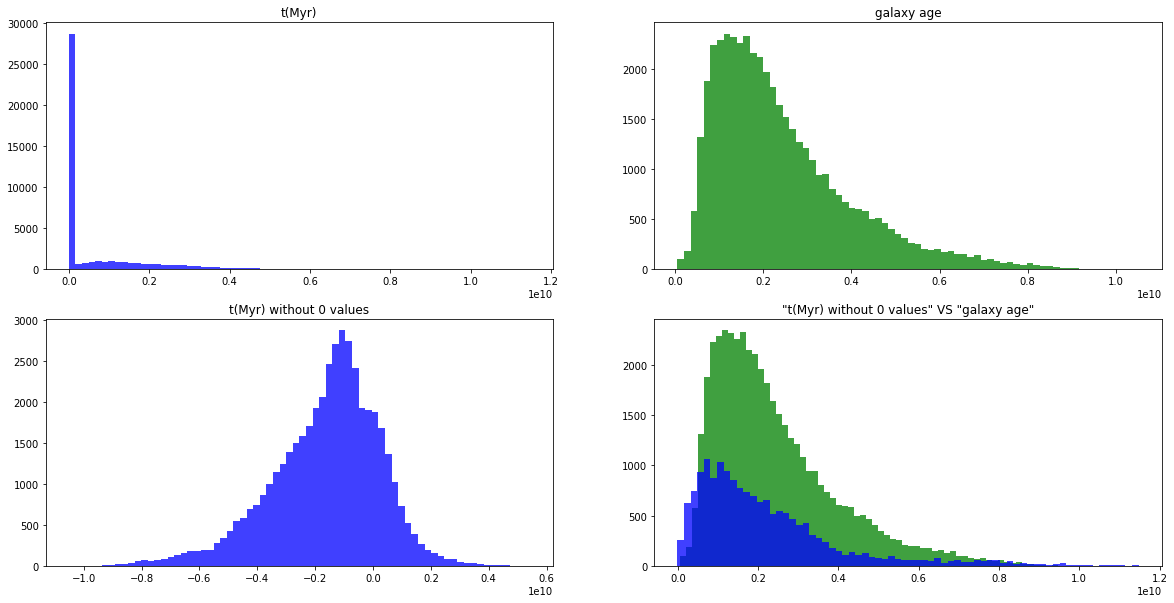

In [112]:
figure, axis = plt.subplots(2, 2, figsize=(20,10))
plt.figure()

axis[0,0].hist(t, bins=70, facecolor='b', alpha=0.75)
axis[0,0].set_title('t(Myr)')

  
axis[0,1].hist(agegal, bins=70, facecolor='g', alpha=0.75)
axis[0,1].set_title('galaxy age')

axis[1,0].hist(t-agegal, bins=70, facecolor='b', alpha=0.75)
axis[1,0].set_title('t(Myr) without 0 values')

axis[1,1].hist(agegal, bins=70, facecolor='g', alpha=0.75)
axis[1,1].hist(t_0 , bins=70, facecolor='b', alpha=0.75)
axis[1,1].set_title('"t(Myr) without 0 values" VS "galaxy age"')

  
plt.close()
plt.show()

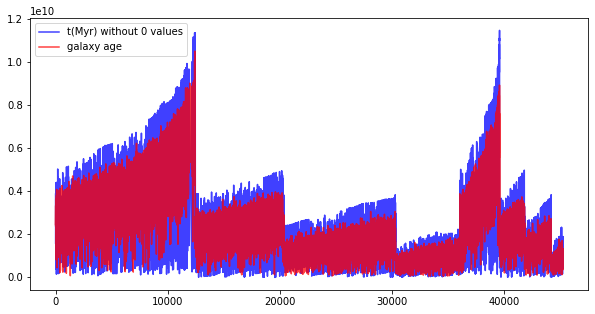

In [84]:
plt.figure(figsize=(10,5))
plt.plot(t_0, 'b', alpha = 0.75, label = 't(Myr) without 0 values')
plt.plot(agegal, 'r', alpha = 0.75, label = 'galaxy age')
plt.legend()

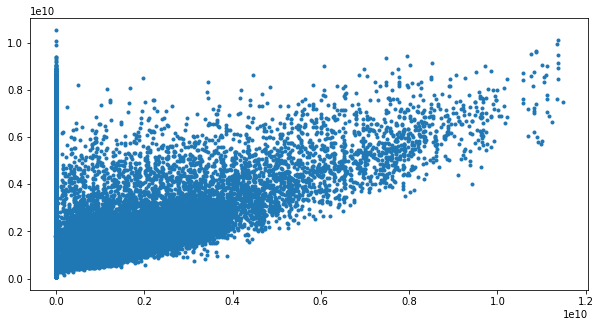

In [99]:
plt.figure(figsize=(10,5))
plt.scatter(t, agegal, marker='.')